In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [7]:
stats = pd.read_csv('C:/Users/andre/Desktop/AI/Research/NBAStatsDataset.csv', usecols = [13,18,25,26,28,29])

In [8]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14758 entries, 0 to 14757
Data columns (total 6 columns):
teamRslt    14758 non-null int64
teamTO      14758 non-null int64
team2PA     14758 non-null int64
team2PM     14758 non-null int64
team3PA     14758 non-null int64
team3PM     14758 non-null int64
dtypes: int64(6)
memory usage: 691.9 KB


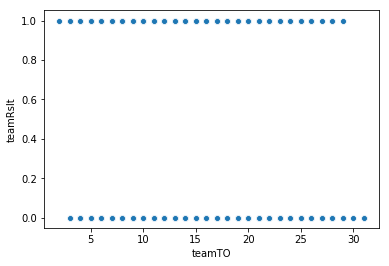

In [9]:
sns.scatterplot(stats.teamTO,stats.teamRslt)

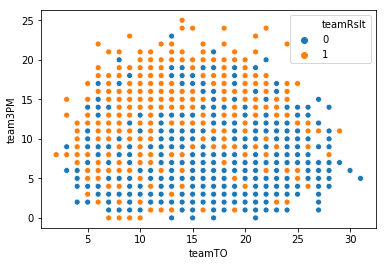

In [22]:
sns.scatterplot(stats.teamTO, stats.team3PM, stats.teamRslt)


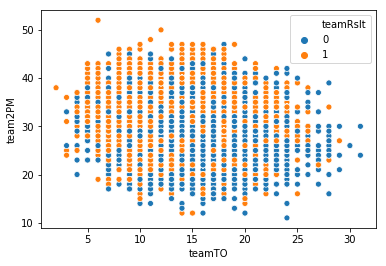

In [24]:
sns.scatterplot(stats.teamTO, stats.team2PM, stats.teamRslt)

In [26]:
X = stats.iloc[:, 1:6].values
y = stats.iloc[:, 0].values

In [27]:
X


array([[13, 58, 24, 32,  8],
       [21, 59, 29, 20,  7],
       [16, 62, 33, 13,  6],
       ...,
       [10, 65, 32, 24,  9],
       [14, 36, 18, 46, 13],
       [11, 54, 31, 26,  7]], dtype=int64)

In [32]:
y

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [125]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [135]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [154]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [155]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [156]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [157]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [158]:
cm

array([[1057,  413],
       [ 453, 1029]], dtype=int64)

In [159]:
accuracy = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
accuracy

0.7066395663956639

Text(0.5, 1.0, 'SVM Decision Region Boundary')

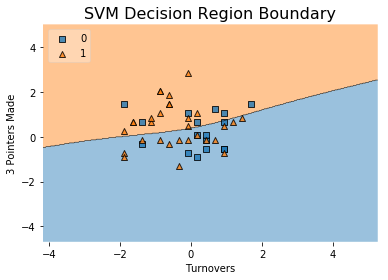

In [161]:
# Visualising the Training set results
from mlxtend.plotting import plot_decision_regions

# Plot Decision Region using mlxtend's plotting function
value = 1.5
width = 0.75
plot_decision_regions(X_train, y_train, clf=classifier, feature_index = [0,2], filler_feature_values={3: value, 1: value, 4: value},
                      filler_feature_ranges={3: width, 1: width, 4: width,},legend=2)

plt.xlabel('Turnovers')
plt.ylabel('3 Pointers Made')
plt.title('SVM Decision Region Boundary', size=16)

Text(0.5, 1.0, 'SVM Decision Region Boundary')

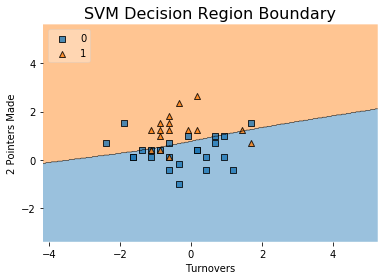

In [160]:
plot_decision_regions(X_train, y_train, clf=classifier, feature_index = [0,4], filler_feature_values={3: value, 1: value, 2: value},
                      filler_feature_ranges={3: width, 1: width, 2: width,},legend=2)

plt.xlabel('Turnovers')
plt.ylabel('2 Pointers Made')
plt.title('SVM Decision Region Boundary', size=16)

Text(0.5, 1.0, 'SVM Decision Region Boundary')

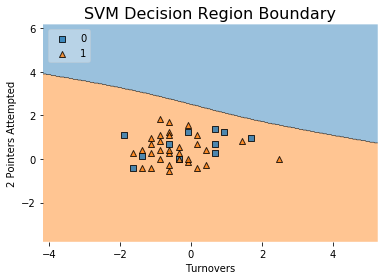

In [162]:
plot_decision_regions(X_train, y_train, clf=classifier, feature_index = [0,3], filler_feature_values={4: value, 1: value, 2: value},
                      filler_feature_ranges={4: width, 1: width, 2: width,},legend=2)

plt.xlabel('Turnovers')
plt.ylabel('2 Pointers Attempted')
plt.title('SVM Decision Region Boundary', size=16)